<a href="https://colab.research.google.com/github/alicesbarros/NetworkAnalysis_TwitterAPI/blob/main/API_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisando a API do Twitter
Disciplina: Análise de Redes

Estudante: Alice Soares Pereira de Barros

Parte do conteúdo deste Google Colaboratory são baseados nos ministrados em aula e no Google Colaboratory da Aula 8, pelo professor Ivanovitch Silva.

IDEIAS DE TEMAS: **BBB, COVID, Vacina, Política, Artistas, UFRN, Energias Renováveis, Mercado Financeiro, SPOTIFY, Ano Novo Lunar**

**1 - (3.0): definir um problema**

    a) QUE PROBLEMAS EU QUERO RESOLVER?

    b) REDE DE USUÁRIOS, HASHTAGS, MENÇÕES, PALAVRAS, ETC

    c) FAZER UM EDA (EXPLORATORY DATA ANALYSIS)


**2- (4.0): extrapolar o uso da API**

    a) Coletar os dados de PELO MENOS UMA semana (7 dias)

    b) Explorar os limites de coleta imposto pela API


3- (1.0): Colocar o modelo em produção  -> TRABALHO DA SEGUNDA UNIDADE

    a) Fazer melhorias na página

    b) Usar outros Frameworks

**4- (2.0): Utilizar as métricas estudadas durante o semestre (2 ou 3 delas)**

**5- (OBRIGATÓRIO) GITHUB, POST(TWITTER E/OU LINKEDIN), MEDIUM OU SIMILAR**

#### Autenticação com a API do Twitter

##### Instalando o Pacote Twython, para a autenticação.

In [ ]:
!pip install Twython

In [ ]:
from twython import Twython, TwythonError

##### Inserindo as informações do aplicativo e obtendo a autorização do URL 

Para autenticar com o Twitter, é preciso fornecer os detalhes do aplicativo e pedir por uma autorizaçao URL do tipo one-time para a autenticação do usuário com o aplicativo.

In [ ]:
# Abrindo o arquivo onde estão as chaves da API para leitura:
rkive = open("keys.txt", "r")

# Lendo os dados do arquivo:
chaves = rkive.read()

# Separando as linhas dentro do arquivo pelo caracter "\n" (espaço para uma nova linha)
API_KEY, API_SECRET_KEY = chaves.split("\n")

# Fechando o arquivo 'rkive':
rkive.close()

Em seguida, vamos usar o Twython para imprimir um URL clicável, que é um link único e só poderemos usar uma vez, visto que ele vai nos direcionar para o PIN de verificação, que será fornecido e usado para as próximas execuções.

In [ ]:
twitterAPI = Twython(API_KEY, API_SECRET_KEY)

tokens_autenticacao = twitterAPI.get_authentication_tokens()
print(tokens_autenticacao['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=ZdT_qAAAAAABYoMUAAABfumVNY4


##### Autorizando o aplicativo com o PIN de verificação, obtido no URL clicável acima:

In [ ]:
# Usar o PIN que foi fornecido no link acima.
PIN = '7788143'

twitterAPI = Twython(API_KEY, API_SECRET_KEY, 
                  tokens_autenticacao['oauth_token'], 
                  tokens_autenticacao['oauth_token_secret'])

tokens_autorizados = twitterAPI.get_authorized_tokens(PIN)

##### ...
Verificando as credenciais do usuário logado.

In [ ]:
twitterAPI = Twython(API_KEY, API_SECRET_KEY, 
                  tokens_autorizados['oauth_token'], 
                  tokens_autorizados['oauth_token_secret'])

twitterAPI.verify_credentials()

{'contributors_enabled': False,
 'created_at': 'Fri Jan 28 23:01:21 +0000 2022',
 'default_profile': True,
 'default_profile_image': False,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 0,
 'follow_request_sent': False,
 'followers_count': 0,
 'following': False,
 'friends_count': 1,
 'geo_enabled': False,
 'has_extended_profile': True,
 'id': 1487198891766333451,
 'id_str': '1487198891766333451',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 0,
 'location': '',
 'name': 'Alice',
 'needs_phone_verification': False,
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1487200270459322373/W7mpQd0f_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1487200270459322373/W7mpQd0f_normal.jpg',
 'p

#### TWITTER API

In [ ]:
# Buscando dados do user da Juliette:
# usuario = twt_API.show_user(screen_name='juliette')

# Buscando dados do user do grupo de K-pop BTS
usuario = twitterAPI.show_user(screen_name='BTS_twt')
usuario

#OR maybe 'btschartdata' 
# user_ = twitter_API.show_user(screen_name='btschartdata')
# user_

{'contributors_enabled': False,
 'created_at': 'Thu Jul 14 06:32:56 +0000 2011',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Hi ! We are BTS !',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'btsblog.ibighit.com',
     'expanded_url': 'http://btsblog.ibighit.com',
     'indices': [0, 23],
     'url': 'https://t.co/ZBW4mCiIC6'}]}},
 'favourites_count': 242,
 'follow_request_sent': False,
 'followers_count': 43967896,
 'following': False,
 'friends_count': 137,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 335141638,
 'id_str': '335141638',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 120701,
 'location': '',
 'name': '방탄소년단',
 'notifications': False,
 'profile_background_color': 'FFFFFF',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif'

##### Alguns dados do usuário 'BTS_twt'

In [ ]:
#Exemplo:
print("""
Este usuário do Twitter @{screen_name} tem 
{followers_count} seguidores, segue {friends_count} usuários
e fez {statuses_count} tweets e retweets (juntos).
  """.format(**usuario))


Este usuário do Twitter @BTS_twt tem 
43967896 seguidores, segue 137 usuários
e fez 12822 tweets e retweets (juntos).
  


##### Antes de seguirmos, sabemos que temos algumas limitações para o uso da API do Twitter, e é possível visualizar essas limitações usando 'get_application_rate_limit_status()'

In [ ]:
twitterAPI.get_application_rate_limit_status()['resources']

{'account': {'/account/authenticate_web_view': {'limit': 50,
   'remaining': 50,
   'reset': 1644597329},
  '/account/change_password': {'limit': 15,
   'remaining': 15,
   'reset': 1644597329},
  '/account/login_verification_enrollment': {'limit': 15,
   'remaining': 15,
   'reset': 1644597329},
  '/account/settings': {'limit': 15, 'remaining': 15, 'reset': 1644597329},
  '/account/update_profile': {'limit': 15,
   'remaining': 15,
   'reset': 1644597329},
  '/account/verify_credentials': {'limit': 75,
   'remaining': 74,
   'reset': 1644597304}},
 'account_activity': {'/account_activity/all/:instance_name/subscriptions': {'limit': 500,
   'remaining': 500,
   'reset': 1644597329},
  '/account_activity/all/:instance_name/webhooks': {'limit': 15,
   'remaining': 15,
   'reset': 1644597329},
  '/account_activity/all/webhooks': {'limit': 15,
   'remaining': 15,
   'reset': 1644597329},
  '/account_activity/direct_messages/:instance_name/subscriptions': {'limit': 15,
   'remaining': 15,
 

In [ ]:
twitterAPI.get_application_rate_limit_status()['resources']['friends']

{'/friends/following/ids': {'limit': 15, 'remaining': 15, 'reset': 1644597332},
 '/friends/following/list': {'limit': 15,
  'remaining': 15,
  'reset': 1644597333},
 '/friends/ids': {'limit': 15, 'remaining': 15, 'reset': 1644597333},
 '/friends/list': {'limit': 15, 'remaining': 15, 'reset': 1644597333}}

In [ ]:
# Durante o processo, o user 'BTS_twt' estava com 43966849 seguidores.
# Como só é possível recuperar, no máximo, 200 * 15 seguidores em 
# uma chamada e, considerando que só é permitido 15 chamadas durante 
# um intervalo de 15 minutos, vai ser necessário (43966849/(200*15))
# -> 14656 chamadas para coletar todos os seguidores de 'BTS_twt'.
# 14656 chamadas * 15 minutos = 219825 minutos.

43967896/(200*15)

14655.965333333334

In [ ]:
# Durante o processo, o user 'BTS_twt' estava seguindo 137 usuários.
# Como só é possível recuperar, no máximo, 200*15 usuários em 
# uma chamada e, considerando que só é permitido 15 chamadas durante 
# um intervalo de 15 minutos, vai ser necessário (137/(200*15))
# -> 1 chamada para coletar todos os usuários que o BTS_twt segue.
# 1 chamada * 15 minutos = 15 minutos.

137/(200*15)

0.04566666666666667

###### SEGUINDO

In [ ]:
# Verificando a taxa de limite para o 'friends' do Twitter, antes das chamadas
twitterAPI.get_application_rate_limit_status()['resources']['friends']

{'/friends/following/ids': {'limit': 15, 'remaining': 15, 'reset': 1644601389},
 '/friends/following/list': {'limit': 15,
  'remaining': 15,
  'reset': 1644601389},
 '/friends/ids': {'limit': 15, 'remaining': 15, 'reset': 1644601389},
 '/friends/list': {'limit': 15, 'remaining': 14, 'reset': 1644601291}}

In [ ]:
import datetime
import pandas as pd

# Para cada uma das características do usuário, serão criadas listas vazias
nomes = []
nomes_usuarios = []
ids = []
localizacao = []
contagem_amigos = []

#Obtendo a data de hoje
datestamp = datetime.datetime.now().strftime("%Y-%m-%d")

# 
BTS_username = 'BTS_twt'

#
next_cursor = -1

In [ ]:
seguindo = twitterAPI.get_friends_list(screen_name = BTS_username,
                                       count = 200,
                                       cursor = next_cursor)

for amigo in seguindo["users"]:
  nomes.append(amigo["name"])
  nomes_usuarios.append(amigo["screen_name"])
  ids.append(amigo["id"])
  localizacao.append(amigo["location"])
  contagem_amigos.append(amigo["followers_count"])

next_cursor = seguindo["next_cursor"]

In [ ]:
# Verificando a taxa de limite para o 'friends' do Twitter, depois das chamadas
twitterAPI.get_application_rate_limit_status()['resources']['friends']

{'/friends/following/ids': {'limit': 15, 'remaining': 15, 'reset': 1644601415},
 '/friends/following/list': {'limit': 15,
  'remaining': 15,
  'reset': 1644601415},
 '/friends/ids': {'limit': 15, 'remaining': 15, 'reset': 1644601415},
 '/friends/list': {'limit': 15, 'remaining': 14, 'reset': 1644601291}}

In [ ]:
# Criando o DataFrame para os 'friends' do usuario 
dtFrame_amg = pd.DataFrame.from_dict({"nome" : nomes, "username" : nomes_usuarios,
                                  "id" : ids, "localização" : localizacao,
                                  "contagem_de_'amigos' " : contagem_amigos})

dtFrame_amg.head(200)

,nome,username,id,localização,contagem_de_'amigos'
0,LIZZOOOOO,lizzo,323417384,Rumors 8/13,1872579
1,TINA SNOW,theestallion,104040220,HTX,7396177
2,James Jean,JamesJeanArt,45045443,,163940
3,jlo 💍,JLo,85603854,"Bronx, NY",45229637
4,Elton John,eltonofficial,174593833,"London, UK",1090773
...,...,...,...,...,...
131,Supreme Boi KOR,supremeboi94,384458172,Future. @supremeboi_kor,169570
132,hitman,hitmanb,165033159,,2600819
133,BIGHIT MUSIC Audition,BIGHITAudition,274272590,,2565412
134,큐티혀니,thehyun11,165415622,,563218


In [ ]:
dtFrame_amg.tail(10)

,nome,username,id,localização,contagem_de_'amigos'
126,KM-MARKIT,kmmarkit,36227268,Where'z my money?!!!,44597
127,BTS JAPAN OFFICIAL,BTS_jp_official,1878450026,,12674501
128,아빠 최고 VITAMIN D,DrunkenTigerJK,47283664,FEELGHOODMUSIC,566140
129,SlowRabbit,SlowRabbit_no1,1583812734,,456898
130,BTS_official,bts_bighit,1409798257,,37329589
131,Supreme Boi KOR,supremeboi94,384458172,Future. @supremeboi_kor,169570
132,hitman,hitmanb,165033159,,2600819
133,BIGHIT MUSIC Audition,BIGHITAudition,274272590,,2565412
134,큐티혀니,thehyun11,165415622,,563218
135,BIGHIT MUSIC,BIGHIT_MUSIC,168683422,"Seoul, Korea",24700102


In [ ]:
# Exportando para arquivo '.csv':
dtFrame_amg.to_csv(BTS_username + "-seguindo--" + datestamp + ".csv")

##### SEGUIDORES

In [ ]:
# Verificando a taxa de limite para o 'followers' do Twitter, antes das chamadas
twitterAPI.get_application_rate_limit_status()['resources']['followers']

{'/followers/ids': {'limit': 15, 'remaining': 15, 'reset': 1644601532},
 '/followers/list': {'limit': 15, 'remaining': 15, 'reset': 1644601532}}

In [ ]:
nm = []
user_nm = []
identidades = []
local = []
cont_seguidores = []

next_cursor = -1

for call in range(10):
  seguidores = twitterAPI.get_followers_list(screen_name = BTS_username,
                                             count = 200, cursor = next_cursor)

  for seguidor in seguidores["users"]:
    nm.append(seguidor["name"])
    user_nm.append(seguidor["screen_name"])
    identidades.append(seguidor["id"])
    local.append(seguidor["location"])
    cont_seguidores.append(seguidor["followers_count"])
    
  next_cursor = seguidores["next_cursor"]

In [ ]:
# Verificando a taxa de limite para o 'followers' do Twitter, depois das chamadas
twitterAPI.get_application_rate_limit_status()['resources']['followers']

{'/followers/ids': {'limit': 15, 'remaining': 15, 'reset': 1644601558},
 '/followers/list': {'limit': 15, 'remaining': 5, 'reset': 1644601553}}

In [ ]:
dtFrame_seg = pd.DataFrame.from_dict({"nome" : nm, "username" : user_nm,
                                  "id" : identidades, "localização" : local,
                                  "contagem_de_seguidores " : cont_seguidores})

dtFrame_seg.head()

,nome,username,id,localização,contagem_de_seguidores


In [ ]:
dtFrame_seg.to_csv(BTS_username + "-seguidores.pt1--" + datestamp + ".csv")

##### Tweet mais recente do usuário "BTS_twt"

In [ ]:
tweet_mais_recente = usuario['status']
tweet_mais_recente

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Jan 20 14:08:14 +0000 2022',
 'entities': {'hashtags': [{'indices': [25, 35], 'text': 'LVMenFW22'},
   {'indices': [94, 107], 'text': 'LouisVuitton'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/LouisVuitton/s…',
    'expanded_url': 'https://twitter.com/LouisVuitton/status/1484163753008668673?s=20',
    'indices': [0, 23],
    'url': 'https://t.co/IDguRcFS62'}],
  'user_mentions': []},
 'favorite_count': 887466,
 'favorited': False,
 'geo': None,
 'id': 1484165878040072194,
 'id_str': '1484165878040072194',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'quoted_status_id': 1484163753008668673,
 'quoted_status_id_str': '1484163753008668673',
 'retweet_count': 195939,
 'retweeted': False,
 'source': '<a hre

In [ ]:
tweet_mais_recente['text']

'https://t.co/IDguRcFS62\n\n#LVMenFW22 is happening now! Watch the fashion show live from Paris.\n#LouisVuitton'

In [ ]:
tweet_mais_recente['entities']

{'hashtags': [{'indices': [25, 35], 'text': 'LVMenFW22'},
  {'indices': [94, 107], 'text': 'LouisVuitton'}],
 'symbols': [],
 'urls': [{'display_url': 'twitter.com/LouisVuitton/s…',
   'expanded_url': 'https://twitter.com/LouisVuitton/status/1484163753008668673?s=20',
   'indices': [0, 23],
   'url': 'https://t.co/IDguRcFS62'}],
 'user_mentions': []}

In [ ]:
tweet_mais_recente['is_quote_status']

True

In [ ]:
tweet_mais_recente['entities']['user_mentions']

[]

##### Busca do Twitter -> buscando #BTS (100 tweets)

In [200]:
# Verificando a taxa de limite para o 'search' do Twitter, antes da busca
twitterAPI.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 179, 'reset': 1644602757}}

In [201]:
# Fazendo a busca do '#BTS', de 100 tweets, até 7 dias antes de 12/02/2022
busca_r = twitterAPI.search(q="#BTS", count= 100, until='2022-02-12')
busca_r

{'search_metadata': {'completed_in': 0.142,
  'count': 100,
  'max_id': 1492197094958026766,
  'max_id_str': '1492197094958026766',
  'next_results': '?max_id=1492197013399687171&q=%23BTS%20until%3A2022-02-12&count=100&include_entities=1',
  'query': '%23BTS+until%3A2022-02-12',
  'refresh_url': '?since_id=1492197094958026766&q=%23BTS%20until%3A2022-02-12&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Fri Feb 11 18:01:25 +0000 2022',
   'entities': {'hashtags': [{'indices': [23, 33], 'text': 'StayAlive'},
     {'indices': [75, 79], 'text': 'BTS'},
     {'indices': [90, 107], 'text': 'StayAlive_CHAKHO'}],
    'symbols': [],
    'urls': [{'display_url': 'youtu.be/yzjTpCgfIII',
      'expanded_url': 'https://youtu.be/yzjTpCgfIII',
      'indices': [115, 138],
      'url': 'https://t.co/28kNDyqewz'}],
    'user_mentions': [{'id': 1313560756558888967,
      'id_str': '1313560756558888967',
      'i

In [202]:
# Verificando a taxa de limite para o 'search' do Twitter, após a busca
twitterAPI.get_application_rate_limit_status()["resources"]["search"]

{'/search/tweets': {'limit': 180, 'remaining': 178, 'reset': 1644602757}}

..

In [203]:
busca_tweets = busca_r['statuses']
tweet1 = busca_tweets[0]
tweet1['user']

{'contributors_enabled': False,
 'created_at': 'Thu Nov 10 14:30:29 +0000 2011',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'IG Acc:  OT7.AMI1604\n\nLike a clown w multiple hats, coz I multi-task n hv lots of job scopes. Stanning BTS is one of those. Positivity is a needed dose. 🇸🇬',
 'entities': {'description': {'urls': []}},
 'favourites_count': 21200,
 'follow_request_sent': False,
 'followers_count': 200,
 'following': False,
 'friends_count': 293,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 409279709,
 'id_str': '409279709',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 0,
 'location': '',
 'name': '⁸OT7.AMI1604⁷',
 'notifications': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 '

In [204]:
len(busca_tweets)

100

##### Fazendo a busca do Twitter, porém com 1.000 tweets

In [251]:
# Verificando a taxa de limite para o 'search' do Twitter, antes da busca
twitterAPI.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 180, 'reset': 1644604453}}

In [252]:
import itertools

NUM_TWEETS = 1600

curs = twitterAPI.cursor(twitterAPI.search, q='#BTS', count=100, until="2022-02-12", result_type='mixed')
busca_tweets = list(itertools.islice(curs, NUM_TWEETS))
len(busca_tweets)

1600

In [253]:
# Verificando a taxa de limite para o 'search' do Twitter, após a busca
twitterAPI.get_application_rate_limit_status()["resources"]["search"]

{'/search/tweets': {'limit': 180, 'remaining': 164, 'reset': 1644604479}}

##### ...

In [254]:
# Criando o dicionario com os tweets obtidos da busca
# e, em seguida, criando o DataFrame para a 'search' #BTS. 

busca_dict = {'usuario': [], "texto": [], "qtd_favoritos": [], "data" : []}

for twt in busca_tweets:
  busca_dict["usuario"].append(twt["user"]["screen_name"])
  busca_dict["texto"].append(twt["text"])
  busca_dict["qtd_favoritos"].append(twt["favorite_count"])
  busca_dict["data"].append(twt["created_at"])

dtF_busca = pd.DataFrame(busca_dict)

In [255]:
dtF_busca.head()

,usuario,texto,qtd_favoritos,data
0,bts_bighit,"Listen to Jung Kook's original soundtrack ""Sta...",339937,Fri Feb 11 06:00:00 +0000 2022
1,7Fates_CHAKHO,#StayAlive Promotion Video out now \n(🔗: https...,153930,Fri Feb 11 05:00:19 +0000 2022
2,BIGHIT_MUSIC,Stay Alive (Prod. SUGA of BTS) Release \n#방탄소년...,232616,Fri Feb 11 05:16:53 +0000 2022
3,jeontaegukkv,RT @bts_bighit: Listen to Jung Kook's original...,0,Fri Feb 11 18:19:38 +0000 2022
4,avocattio,RT @7Fates_CHAKHO: #StayAlive Promotion Video ...,0,Fri Feb 11 18:19:38 +0000 2022


In [256]:
dtF_busca.tail()

,usuario,texto,qtd_favoritos,data
1595,j_waniey,RT @Army_Connect: 📢The new billboard rule is N...,0,Fri Feb 11 04:58:37 +0000 2022
1596,hayunjeong637,RT @LuvThinkAct: @borahye0613 @hayunjeong637 @...,0,Fri Feb 11 04:58:37 +0000 2022
1597,KyungMi25,RT @GraziaIsAnARMY: I can't calm down. Few min...,0,Fri Feb 11 04:58:37 +0000 2022
1598,carrotcakepls,RT @7Fates_CHAKHO: [기사] #방탄소년단 #정국 가창· #슈가 프로듀...,0,Fri Feb 11 04:58:37 +0000 2022
1599,iela6_0,RT @SoulCasa7: 하얗게 서리 내린 아침 출근길 풍경도 이제 곧 사라지겠죠...,0,Fri Feb 11 04:58:37 +0000 2022


In [257]:
dtF_busca.shape

(1600, 4)

##### Gráfico (user BTS_twt e Anitta)



In [ ]:
import networkx as nx 

GraphDi = nx.DiGraph()

bts = twitterAPI.show_user(screen_name = "BTS_twt")
anitta = twitterAPI.show_user(screen_name = "Anitta")

GraphDi.add_edge(bts["screen_name"], anitta["screen_name"], weight=1)

In [ ]:
GraphDi.edges(data=True)

OutEdgeDataView([('BTS_twt', 'Anitta', {'weight': 1})])

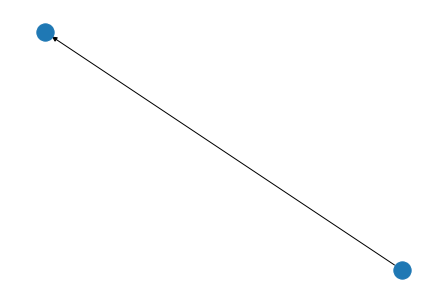

In [ ]:
%matplotlib inline
nx.draw(GraphDi)

##### Analisando alguns Twetts, com 2000 tweets

In [180]:
# Verificando a taxa de limite para o 'search' do Twitter, antes da busca
twitterAPI.get_application_rate_limit_status()["resources"]["search"]

{'/search/tweets': {'limit': 180, 'remaining': 180, 'reset': 1644602144}}

In [ ]:
import itertools

NUM_TWEETSS = 2000

crsr = twitterAPI.cursor(twitterAPI.search, q="#BTS", count=100, until="2022-02-12", result_type="mixed")
busca_tweets = list(itertools.islice(crsr, NUM_TWEETSS))
len(busca_tweets)

2000

In [ ]:
# Verificando a taxa de limite para o 'search' do Twitter, após a busca
twitterAPI.get_application_rate_limit_status()["resources"]["search"]

{'/search/tweets': {'limit': 180, 'remaining': 79, 'reset': 1644597495}}

In [ ]:
busca_tweets[0]

##### ....

In [258]:
lista_retweets = []

for tweets in busca_tweets:
  if 'retweeted_status' in tweets:
    lista_retweets.append(tweets)

len(lista_retweets)

1394

In [259]:
lista_retweets[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Feb 11 18:19:38 +0000 2022',
 'entities': {'hashtags': [{'indices': [19, 29], 'text': 'StayAlive'}],
  'symbols': [],
  'urls': [{'display_url': 'youtu.be/yzjTpCgfIII',
    'expanded_url': 'https://youtu.be/yzjTpCgfIII',
    'indices': [59, 82],
    'url': 'https://t.co/jnRDwyeaV1'}],
  'user_mentions': [{'id': 1416931512906178561,
    'id_str': '1416931512906178561',
    'indices': [3, 17],
    'name': '7FATES: CHAKHO by HYBE',
    'screen_name': '7Fates_CHAKHO'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1492201678095130625,
 'id_str': '1492201678095130625',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 91814

##### Grafico

In [260]:
import networkx as nx
GraphD_ = nx.DiGraph()

for rt in lista_retweets:
  status_rtd = rt["retweeted_status"]
  status_user_rtd = status_rtd["user"]["screen_name"]
  st_user_rtr = rt["user"]["screen_name"]
  
  if GraphD_.has_edge(status_user_rtd, st_user_rtr):
    GraphD_.edges[status_user_rtd, st_user_rtr]["weight"] += 1
  else:
    GraphD_.add_edge(status_user_rtd, st_user_rtr, weight=1)

##### Usuario mais 'retweetado'

In [261]:
max(GraphD_.nodes, key=GraphD_.out_degree)

'modooborahae'

In [234]:
# Obtendo os 10 usuarios mais 'retweetados'
#from operator import itemgetter

#sorted(GraphD_.out_degree(), key=itemgetter(1), reverse=True)[:10]

In [262]:
# Obtendo os 10 usuarios mais 'retweetados' sem desconsiderar o 'weight' do edge
from operator import itemgetter

sorted(GraphD_.out_degree(weight="weight"), key=itemgetter(1), reverse=True)[:10]

[('modooborahae', 255),
 ('7Fates_CHAKHO', 158),
 ('BTSTrendSongs', 96),
 ('purpleloveplus', 92),
 ('ARMYonSpotify', 39),
 ('army_cavite', 36),
 ('Army_Connect', 29),
 ('kimseokjingifs', 29),
 ('ZER0XBLACK', 22),
 ('vminiecats', 21)]

##### Detectando anomalias

In [263]:
max(GraphD_.nodes, key=GraphD_.in_degree)

'4parkagust'

In [264]:
sorted(GraphD_.in_degree(weight="weight"), key=itemgetter(1), reverse=True)[:10]

[('4parkagust', 14),
 ('sietechicosamor', 14),
 ('malyramos_', 11),
 ('AVARMY_TWT', 11),
 ('Hobii010997', 8),
 ('sunnylovebts7', 7),
 ('jilld047', 7),
 ('LeeMOT7777777', 7),
 ('mikrokosmosmind', 6),
 ('vvvvv19130', 6)]

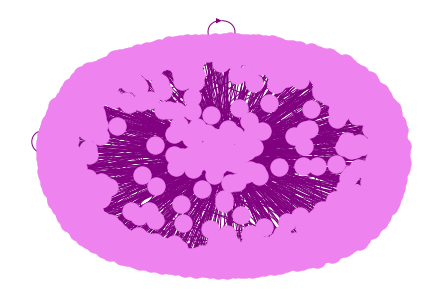

In [265]:
nx.draw(GraphD_, node_color="violet", edge_color="purple")

##### C

In [266]:
nx.is_weakly_connected(GraphD_)

False

In [267]:
nx.number_weakly_connected_components(GraphD_)

147

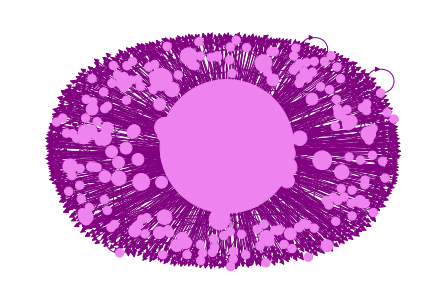

In [268]:
tam_nodes = [GraphD_.out_degree(no, weight="weight") * 70 for no in GraphD_.nodes]

%matplotlib inline
nx.draw(GraphD_, node_size=tam_nodes, node_color="violet", edge_color="purple")

##### Rede de Menções

In [270]:
# Verificando a taxa de limite para o 'search' do Twitter, 
# antes da busca para '#BTSARMY'
twitterAPI.get_application_rate_limit_status()["resources"]["search"]

{'/search/tweets': {'limit': 180, 'remaining': 154, 'reset': 1644604479}}

In [269]:
import itertools

NUM_TWEETS_ = 1000

csr = twitterAPI.cursor(twitterAPI.search, q="#BTSARMY", count=100, until="2022-02-12", result_type="mixed")
buscaTweets = list(itertools.islice(csr, NUM_TWEETS_))
len(buscaTweets)

1000

In [271]:
# Verificando a taxa de limite para o 'search' do Twitter, 
# depois da busca para '#BTSARMY'
twitterAPI.get_application_rate_limit_status()["resources"]["search"]

{'/search/tweets': {'limit': 180, 'remaining': 154, 'reset': 1644604479}}

In [272]:
buscaTweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Feb 11 05:01:04 +0000 2022',
 'entities': {'hashtags': [{'indices': [8, 16], 'text': 'BTSARMY'},
   {'indices': [21, 31], 'text': 'StayAlive'},
   {'indices': [46, 55], 'text': 'Jungkook'},
   {'indices': [74, 79], 'text': 'SUGA'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1492000710971383809',
    'indices': [110, 133],
    'url': 'https://t.co/dP09TecXqD'}],
  'user_mentions': []},
 'favorite_count': 96315,
 'favorited': False,
 'geo': None,
 'id': 1492000710971383809,
 'id_str': '1492000710971383809',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'popular'},
 'place': None,
 'possibly_sensitive': False,
 'retweet_count

In [274]:
import networkx as nx

DGraph = nx.DiGraph()

for twt in buscaTweets:
  scrNam_tweet = twt["user"]["screen_name"]
  for men_Usuario in twt["entities"]["user_mentions"]:
    scrName_mencionado = men_Usuario["screen_name"]

    conexao = (scrNam_tweet, scrName_mencionado)
    if DGraph.has_edge(*conexao):
      DGraph.edges[conexao]["weight"] += 1
    else:
      DGraph.add_edge(*conexao, weight=1)

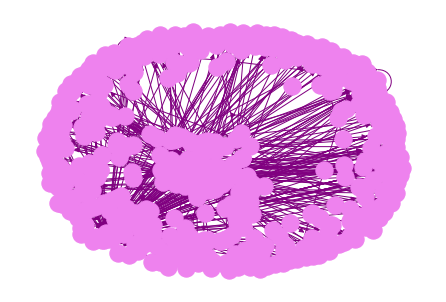

In [275]:
nx.draw(DGraph, edge_color="purple", node_color="violet")

In [276]:
max(DGraph.nodes, key=DGraph.in_degree)

'BTS_twt'

In [278]:
from operator import itemgetter

sorted(DGraph.in_degree(), key=itemgetter(1), reverse=True)[:10]

[('BTS_twt', 230),
 ('VoteWithARMY', 41),
 ('GlobalBTSVoting', 30),
 ('allforarmy', 15),
 ('BTSVotingTroop', 12),
 ('01Btsxarmy', 12),
 ('VoteWithAMI', 10),
 ('BTSVotingTalk', 10),
 ('BTSPublicity', 9),
 ('BANGTANHIIT', 8)]

In [277]:
from operator import itemgetter

sorted(DGraph.in_degree(weight="weight"), key=itemgetter(1), reverse=True)[:10]

[('BTS_twt', 817),
 ('VoteWithARMY', 63),
 ('BANGTANHIIT', 55),
 ('01Btsxarmy', 52),
 ('GlobalBTSVoting', 42),
 ('blue_jh7', 31),
 ('allforarmy', 15),
 ('BTSVotingTroop', 13),
 ('VoteWithAMI', 12),
 ('BTSVotingTalk', 11)]

##### Usuários que estão mencionando a `#BTSARMY` mais vezes

In [283]:
sorted(DGraph.out_degree(weight="weight"), key=itemgetter(1), reverse=True)[:10]

[('rkivemint', 165),
 ('Hopew94', 60),
 ('C_Adawong', 58),
 ('forvoting_0', 42),
 ('Nastaran7995', 39),
 ('Noemi02046504', 38),
 ('Gleicyane97', 37),
 ('I_purple_you_B7', 30),
 ('Monika16101', 27),
 ('onlybtspop13', 25)]

##### C

In [284]:
nx.is_weakly_connected(DGraph)

False

In [285]:
nx.number_weakly_connected_components(DGraph)

49

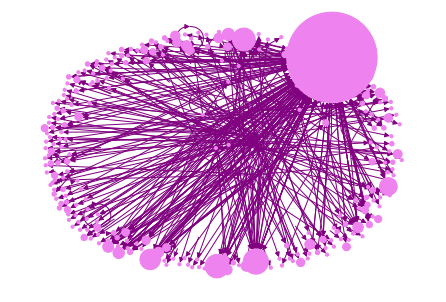

In [288]:
node_tam = [DGraph.in_degree(node, weight="weight") * 10 for node in DGraph.nodes]

%matplotlib inline
nx.draw(DGraph, node_size=node_tam, node_color="violet", edge_color="purple")